In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/My\ Drive/kaggle.json /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -f train-jpg.tar.7z planet-understanding-the-amazon-from-space
!kaggle competitions download -f train_v2.csv planet-understanding-the-amazon-from-space
!kaggle competitions download -f sample_submission_v2.csv planet-understanding-the-amazon-from-space
#!kaggle competitions download -c planet-understanding-the-amazon-from-space

 98% 589M/600M [00:11<00:00, 26.4MB/s]
100% 600M/600M [00:11<00:00, 53.5MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 46.6MB/s]
  0% 0.00/154k [00:00<?, ?B/s]
100% 154k/154k [00:00<00:00, 47.3MB/s]


cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
!unzip train_v2.csv.zip
!unzip sample_submission_v2.csv.zip

Archive:  train_v2.csv.zip
replace train_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace train_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train_v2.csv            
  inflating: __MACOSX/._train_v2.csv  
Archive:  sample_submission_v2.csv.zip
  inflating: sample_submission_v2.csv  
  inflating: __MACOSX/._sample_submission_v2.csv  


In [9]:
!7za x train-jpg.tar.7z
!tar xf train-jpg.tar


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 629296207 bytes (601 MiB)

Extracting archive: train-jpg.tar.7z
--
Path = train-jpg.tar.7z
Type = 7z
Physical Size = 629296207
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train-jpg.tar                      1% - train-jpg.tar                      2% - train-jpg.tar                      3% - train-jpg.tar                      4% - train-jpg.tar                      5% - train-jpg.tar                      6% - train-jpg.tar

In [10]:
from fastai import *
from fastai.vision import *

path = Path('train-jpg'); path.ls()[:5]

[PosixPath('train-jpg/train_33955.jpg'),
 PosixPath('train-jpg/train_29205.jpg'),
 PosixPath('train-jpg/train_34774.jpg'),
 PosixPath('train-jpg/train_21663.jpg'),
 PosixPath('train-jpg/train_23163.jpg')]

In [0]:
import pandas as pd
import numpy as np

In [12]:
train_df = pd.read_csv('train_v2.csv'); train_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=True, 
                      max_rotate=90.0, 
                      max_zoom=1.1, 
                      max_lighting=0.2, 
                      max_warp=0, 
                      p_affine=0.75, 
                      p_lighting=0.75)

In [0]:
il = (
    ImageList.from_df(train_df, 'train-jpg', suffix='.jpg')
    .split_by_rand_pct(0.2)
    )

In [15]:
il

ItemLists;

Train: ImageList (32384 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: train-jpg;

Valid: ImageList (8095 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: train-jpg;

Test: None

In [0]:
ll = il.label_from_df(label_delim=' ')

In [17]:
ll.transform(tfms=tfms, size = 128)

LabelLists;

Train: LabelList (32384 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,agriculture;clear;primary;water,clear;primary,agriculture;clear;habitation;primary;road,haze;primary;water
Path: train-jpg;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
agriculture;clear;cultivation;primary,haze;primary,clear;primary,clear;primary;water,clear;primary
Path: train-jpg;

Test: None

In [0]:
data_128 = ll.databunch()

In [19]:
data_128.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (32384 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,agriculture;clear;primary;water,clear;primary,agriculture;clear;habitation;primary;road,haze;primary;water
Path: train-jpg;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
agriculture;clear;cultivation;primary,haze;primary,clear;primary,clear;primary;water,clear;primary
Path: train-jpg;

Test: None

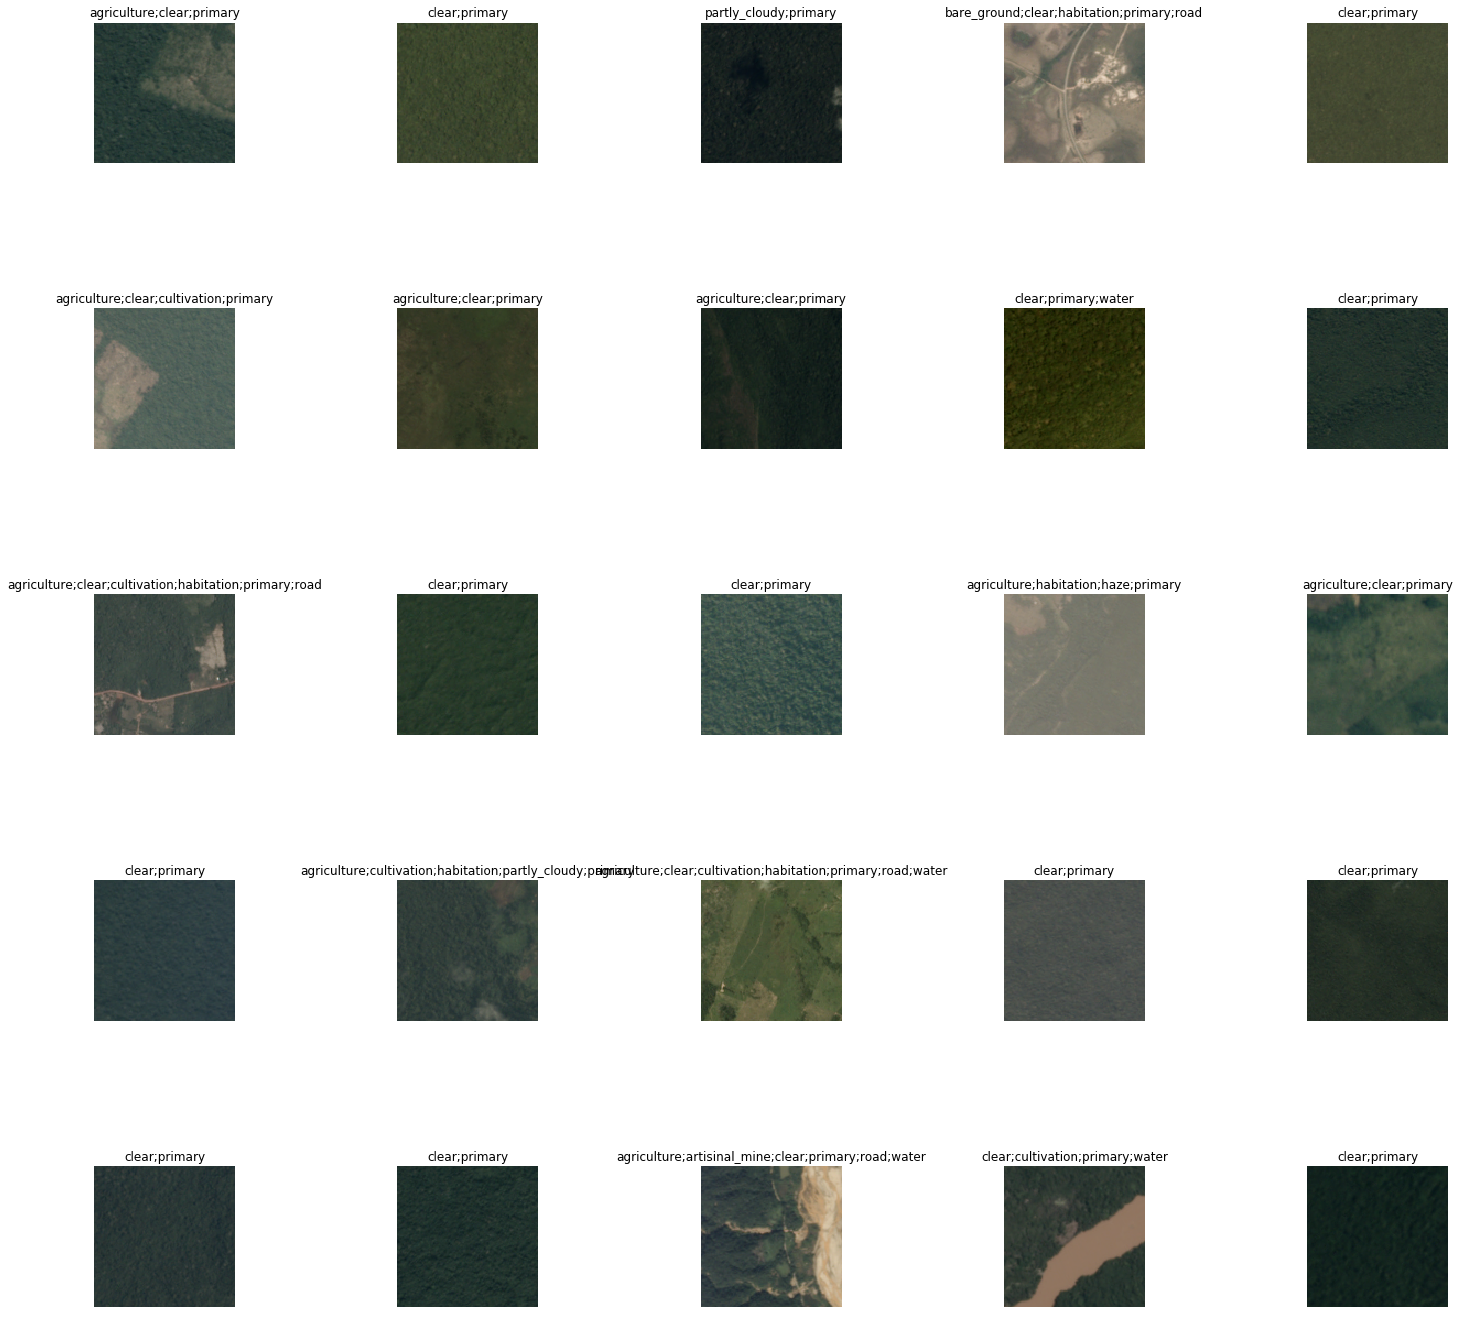

In [23]:
data_128.show_batch()

In [24]:
data_128.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [26]:
data_128.c

17

In [0]:
acc_tresh = partial(accuracy_thresh, thresh=0.2)

In [0]:
learn = cnn_learner(data_128, models.resnet34, metrics = [acc_tresh])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


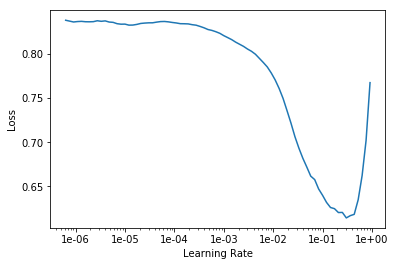

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.124468,0.111404,0.940682,02:38
1,0.118913,0.105280,0.947266,02:38
2,0.111790,0.101405,0.949155,02:36
3,0.102570,0.093501,0.951088,02:36
4,0.100027,0.091449,0.952781,02:37


In [0]:
output_f = Path('/content/drive/My Drive/planet')

In [0]:
learn.save(output_f/'resnet34-128-stage1')

In [30]:
learn.load(output_f/'resnet34-128-stage1')

Learner(data=ImageDataBunch;

Train: LabelList (32384 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,agriculture;clear;primary;water,clear;primary,agriculture;clear;habitation;primary;road,haze;primary;water
Path: train-jpg;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
agriculture;clear;cultivation;primary,haze;primary,clear;primary,clear;primary;water,clear;primary
Path: train-jpg;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (co

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


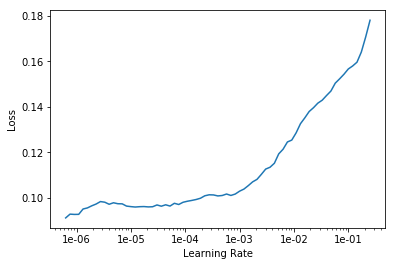

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-5,1e-3/20))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.099102,0.091454,0.952294,02:34
1,0.099277,0.090328,0.952658,02:35
2,0.097587,0.090537,0.953908,02:35
3,0.095948,0.089634,0.954002,02:35
4,0.093591,0.089083,0.953886,02:35


In [0]:
learn.save(output_f/'resnet34-128-stage2')

In [31]:
learn.load(output_f/'resnet34-128-stage2')

Learner(data=ImageDataBunch;

Train: LabelList (32384 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,agriculture;clear;primary;water,clear;primary,agriculture;clear;habitation;primary;road,haze;primary;water
Path: train-jpg;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
agriculture;clear;cultivation;primary,haze;primary,clear;primary,clear;primary;water,clear;primary
Path: train-jpg;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (co

In [32]:
!kaggle competitions download -f  test_v2_file_mapping.csv planet-understanding-the-amazon-from-space

  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 34.1MB/s]


In [33]:
!unzip test_v2_file_mapping.csv.zip

Archive:  test_v2_file_mapping.csv.zip
  inflating: test_v2_file_mapping.csv  


In [0]:
test_df = pd.read_csv('test_v2_file_mapping.csv')